## What is a Genetic Algorithm?

It is a optimization algorithm inspired on the ideia of Evolution of Species through Natural Selection.
There basic parts of it are::
- Initial population: set of individuals wtih different caractheristics.
- Fitness function: a way to evaluate how fitted for survival each indidual is.
- Selection: step of selecting the fittest individuals that will pass genes to the next generation.
- Crossover: mixture of the genes from each parent individual.
- Mutation: random mutations that occur in the offspring



A pseudo algorithm could be:
1. set convergence rule
1. current population = initial population
1. while not converged: 
    1. calculate fitness score of each individual in current population
    1. select fittest
    1. set offspring = crossover of fittest
    1. do mutation step to offspring
    1. current population = offspring


In [14]:
#from ..foo import bar
#import os
#os.environ
import os, sys
dir = os.path.abspath('..')
if not dir in sys.path: 
    sys.path.insert(0, dir)

In [3]:
#!pip list
import ga

In [6]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from string import ascii_letters
from tqdm.cli import tqdm
import pandas as pd
import matplotlib.pyplot as plt

#import genetic_algo
from ga import BaseIndividual, Population

def has_converged(best_scores, gen, gen_limit, delta_gen, min_diff):
    
    if gen > gen_limit:
        return True
    
    # if gen >= delta_gen:
    #     last_score = best_scores[-1]
    #     nth_score = best_scores[-delta_gen]
    #     diff = last_score - nth_score

        #print(f"#{gen}: {last_score}, #{gen-delta_gen}: {nth_score}, diff: {diff}")

        # if abs(diff) <= min_diff:
        #     return True

    return False
    


# each individual is a string of letters
POP_SIZE = 100
ALLELES = np.array(tuple(ascii_letters + " ")) # set of possible ALLELES
ALLELES_SIZE = len(ALLELES) # set size

SOLUTION = np.array(tuple("Hello World"))
CHROMOSOME_SIZE = len(SOLUTION) # number of ALLELES in  each individual

MATING_PROP = 0.20 # selects top 20% fittest
MATING_N = int(POP_SIZE * MATING_PROP)

MUTATION_PROB = 0.1

GEN_LIMIT = 100



class Individual(BaseIndividual):
    def __init__(self, chromosome):
        super().__init__(chromosome, ALLELES)



<AxesSubplot:xlabel='gen', ylabel='best_score'>

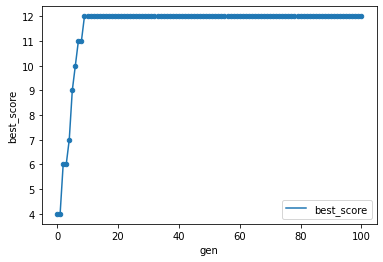

In [3]:

# objective fun
def func_fitness(x):
    return 1 + np.sum(x.chromosome == SOLUTION)


def get_random_individuals(alleles, chromosome_size):
    return Individual(np.random.choice(alleles, size = chromosome_size))




pop = Population([get_random_individuals(ALLELES, CHROMOSOME_SIZE) for _ in range(POP_SIZE)])

best_scores=[]
metrics = []
gen=0
while not has_converged(best_scores, gen, gen_limit=GEN_LIMIT, delta_gen=20, min_diff=0):
    
    # 1. calculate fitness score of each individual in current population
    pop_scores = pop.calc_fitness_scores(func_fitness)
    idx_order = pop.calc_fittests_rank()
    
    # store metrics about generation
    best_score = pop_scores[idx_order[0]]
    best_scores.append(best_score)

    metrics.append(dict(
        gen=gen,
        best_individual=pop.pop[idx_order[0]],
        best_score=best_score,
    ))

    # 1. select
    mating_pop = pop.select_top_fittests(n = MATING_N)

    # 1. crossover
    pop = mating_pop.mate_randomly(pop.size)
    
    # 1. mutate
    pop = pop.mutate(mutate_prob=MUTATION_PROB)

    gen+=1




dfmetrics = pd.DataFrame(metrics)
ax = dfmetrics.plot.line('gen','best_score')
dfmetrics.plot.scatter('gen','best_score', ax=ax)


In [4]:
dfmetrics

,gen,best_individual,best_score
0,0,JZPOgZMonld,4
1,1,IelcI N im,4
2,2,HlPOg GoAld,6
3,3,HelsI WQ iD,6
4,4,HZPOg Gorld,7
...,...,...,...
96,96,Hello World,12
97,97,Hello World,12
98,98,Hello World,12
99,99,Hello World,12
